# Introduction to Data Science
## Homework 2

Student Name:  
Student Netid:   
***

### Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [69]:
import pandas as pd
import numpy as np

f = 'C:/Users/Messimx/Documents/GitHub/DataScienceCourse/ipython/hw/hw_2/data/cell2cell_data.csv'
Head=['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep']
train_split = 0.8
dat = pd.read_csv(f, header=None,names=Head)
dat_shuf=dat.reindex(np.random.permutation(dat.index))

train = dat_shuf[:int(np.floor(dat_shuf.shape[0] * train_split))]
test = dat_shuf[int(np.floor(dat_shuf.shape[0] * train_split)):]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

***Answer:***    
Randomly sampling data on X means, the features of data(like in the above example,'revenue','outcalls','incalls'.....) are independent with the sample S we draw from X. These features of data in sample S won't have a common appearance.(An example of common appearances is most of them have a high level of 'revenue')

So, if we want a test to prove our data are randomly sampled, we can just use 'DataFrame.describe()' function to process sampled data and population data. The funciton will give some statistic results for the features of sampled data and popoulation data. If the sampled data are randomly chosedn, the result of sampled data and population data should look similar.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train.drop('churndep',1),train['churndep'])

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

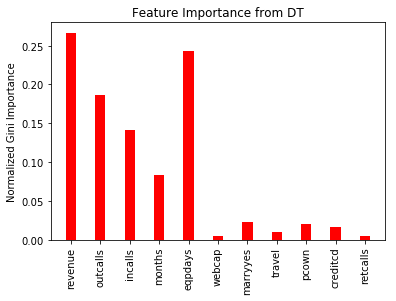

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
width = 0.35

ax.bar(np.arange(11), clf.feature_importances_, width, color = 'r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train.drop('churndep',1).columns.values, rotation = 90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [113]:
data_imp3=[dat['revenue'],dat['outcalls'],dat['eqpdays'],dat['churndep']]
np.corrcoef(data_imp3)

array([[ 1.        ,  0.50087037, -0.22195804, -0.01356608],
       [ 0.50087037,  1.        , -0.24399925, -0.03723303],
       [-0.22195804, -0.24399925,  1.        ,  0.11273099],
       [-0.01356608, -0.03723303,  0.11273099,  1.        ]])

***Answer:***  
The relationship between 'revenue' and 'outcalls' are positive  
The relationship between 'revenue' and 'eqpdays' are negative  
The relationship between 'revenue' and 'churndep' are negtive  
The relationship between 'outcalls' and 'eqpdays' are negtive  
The relationship between 'outcalls' and 'churndep' are negtive  
The relationship between 'eqpdays' and 'churndep' are positive  

Higher revenue,higher outcalls and lower eqpdays will lead to a lower possibility of churns.  

In real life:  
**Revenue and Churns(negative):**    
If a person pays high monthly fee for the service, which at most time means they use the service so much and they are able to pay for the high price. If they don't like the service or they have intentions to churn, they won't use the service so much and the revenue the company can charge from them won't be high. Additionally, if they can afford the high price which means they probably don't care about money that much. So they less possibly will churn because of the cost fluctuation of service. Therefore, higher revenue leads to a lower possibility of churns.  
**Outcalls and Churns(negative):**   
High outcall times means the customer use the service frequently. If the serice is not good, they won't use it much times. So, a customer with high outcalls mostly like the service thus won't churn in the future. So, higher outcalls lead to a lower possibility of churns.  
**Eqpdays and Churns(positive):**    
According to human-being's nature, we don't like change. So when a customer just gets his new equipment and service, he or she intends not to change the service, which means he or she doesn't want to churn. So, lower eqpdays lead to a lower possibility of churns

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [72]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import sys

y='churndep'

def testTrees(X_train, y_train, X_test, y_test,auc):
    clf = DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test), y_test)
        accuracy= (cm[0,0]+cm[1,1])/cm.sum()
        return accuracy
    else:
        return roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

train_accuracy=testTrees(train.drop(y,1),train[y],train.drop(y,1),train[y],0)
test_accuracy=testTrees(train.drop(y,1),train[y],test.drop(y,1),test[y],0)
print('train_accuracy={}'.format(train_accuracy))
print('test_accuracy={}'.format(test_accuracy))

train_accuracy=0.9998431962868881
test_accuracy=0.5292272955343703


### Part 2 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [78]:
# Code here

min_samples_split_values = [100,500,1000,1500,1800,2000,2500,3000,3200,3500]
min_samples_leaf_values = [1,5,10,15,20,30,40,60,80,100]

2\. Explain in words your reasoning for choosing the above ranges.

*Answer:*  
I choose these two ranges because I have redone the below steps several times and found that these two ranges can roughly show the peak of the configurations with relative highest values among ranges I have tried.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

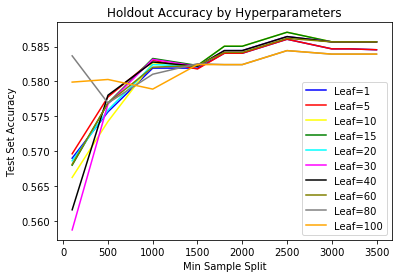

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

y = 'churndep'

def testTreesNew(X_train, y_train, X_test, y_test,split,leaf,auc):
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=split,min_samples_leaf=leaf)
    clf = clf.fit(X_train, y_train)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test), y_test)
        accuracy= (cm[0,0]+cm[1,1])/cm.sum()
        return accuracy
    else:
        return roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

run=1
if (run == 1):
    res = dict()
    for l in min_samples_leaf_values:
        res[l] = list()

    for l in min_samples_leaf_values:
        for s in min_samples_split_values:
            res[l].append(testTreesNew(train.drop(y, 1), train[y], test.drop(y, 1), test[y], s, l, 0))


#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)
colors=['blue','red','yellow','green','cyan','magenta','black','olive','grey','orange',]
for i,cl in enumerate(colors):
    plt.plot(min_samples_split_values,res[min_samples_leaf_values[i]], color=cl, label = 'Leaf={}'.format(min_samples_leaf_values[i]))

plt.legend(loc = 4)
ax.set_xlabel('Min Sample Split')
ax.set_ylabel('Test Set Accuracy')
plt.title('Holdout Accuracy by Hyperparameters')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [80]:
res[15]

[0.56798795785248368,
 0.57689412945308582,
 0.58329152032112397,
 0.58228800802809833,
 0.58504766683391873,
 0.58504766683391873,
 0.58705469141996991,
 0.58567486201705976,
 0.58567486201705976,
 0.58567486201705976]

***Answer:***  
When min_sample_leaf=15 and min_sample_split=2500, the configuration returns the best accuracy. The best accuracy is 0.58705469141996991.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

***Answer:***  
When I have a churn production model, I will put a customers' feature data into the model and get the prediction. Based on that prediction, I then decide if I need give extra promotion or service to the customer to make him keep using our products.
By using churn prediction, I can target the potential churns and reduce the cost for keeping customers.
Through targeting the potential churns, the company can collect the reasons why the customers have intention to churn and fix the problems before the customers take action to churn.